In [74]:
from LCSPS import LCSPS
from LCSPSGM import LCSPSGM

In [75]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
import pickle
import numpy as np
from matplotlib import pyplot as plt 
import sys 

sys.path.append('/Users/thinhhoang/Documents/anomaly-detection-ngsim/lanechange')

pfile = pickle.load(open( "lane.pyo", "rb" ))
tvec = pfile['t_vec'][0]
xvec = pfile['x_vec']

fpca_discretized = pickle.load(open('fpca.pyo', 'rb'))
basis = fpca_discretized.components_.data_matrix.reshape((-1,fpca_discretized.components_.data_matrix.shape[1])).transpose()
basis = basis[:,:2]
mean = fpca_discretized.mean_.data_matrix.reshape((-1,1))

lcdts = pickle.load(open('lcsp.pyo','rb'))

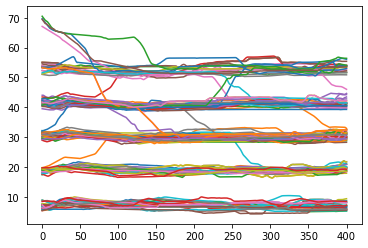

In [77]:
for i in range(xvec.shape[0]):
    plt.plot(xvec[i,:])

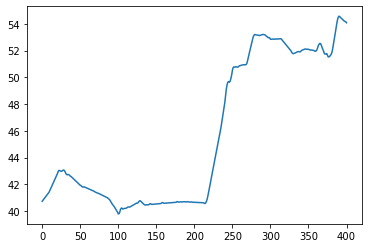

In [78]:
sample_traj = xvec[112,:]

# sample_traj = np.zeros_like(mean)
# sample_traj[:24] = (lcdts[0].reshape((-1,1)) - mean)[0]
# sample_traj[24:] = (lcdts[0].reshape((-1,1)) - mean)[:-24]
# sample_traj = xvec[16,:]
plt.plot(sample_traj)
plt.show()

Text(0.5, 1.0, 'Mean')

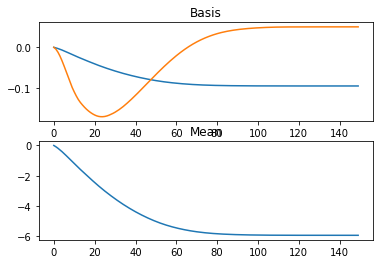

In [79]:
plt.subplot(2,1,1)
for i in range(basis.shape[1]):
    plt.plot(-basis[:,i])
plt.title('Basis')
plt.subplot(2,1,2)
plt.plot(-mean)
plt.title('Mean')

## Linear basis

In [80]:
lbasis = np.arange(sample_traj.shape[0]).reshape((-1,1)) / sample_traj.shape[0]

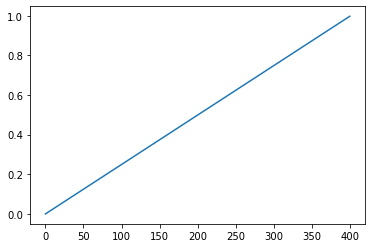

In [81]:
plt.plot(lbasis)

## Detection code

With the Gaussian mixture, we have multiple means and covariance matrices

In [199]:
lcs = LCSPSGM(
    np.array([[[0]],[[40.]]]),
    np.array([[[1e-5]],[[0.1]]]),
    0.001,
    np.zeros(lbasis.shape[0]).reshape((-1,1)),
    lbasis,
    np.array([0.5, 0.5])
)

Initialization of LCSPS completed


In [200]:
for i in range(300):
    lcs.add_datum(sample_traj[i])
print('Completed adding datums into the LCS')

Completed adding datums into the LCS


In [201]:
pij = lcs.marginalize_repr_all_subseqs()

In [212]:
ck, ck_llh, first_t, second_t = lcs.get_change_point(pij, K=3)

Changepoint placement k=1: [0, 202]
Changepoint placement k=1: [203, 299]
Changepoint placement k=2: [203, 241]
Changepoint placement k=2: [242, 299]
Changepoint placement k=3: [242, 276]
Changepoint placement k=3: [277, 299]


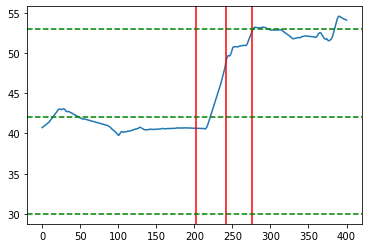

In [213]:
plt.plot(sample_traj)
for i in range(len(ck)):
    if i>0 and i<len(ck)-1:
        plt.axvline(x=ck[i], color='r')
plt.axhline(y=30, color='g', linestyle='--')
plt.axhline(y=42, color='g', linestyle='--')
plt.axhline(y=53, color='g', linestyle='--')

Likelihood of segments

In [214]:
ck_llh

array([        0.        , -89329748.09762809, -16676658.77895929,
        -1412354.85558721,         0.        ])